<a href="https://colab.research.google.com/github/Rohil72/ML_LAB/blob/main/MLLAB11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Dimensionality Reduction: PCA Results ---
Original Feature Count: 13
Reduced PCA Shape: (178, 2)
Explained Variance Ratio by each PC: [0.362 0.192]
Cumulative Explained Variance: 0.554


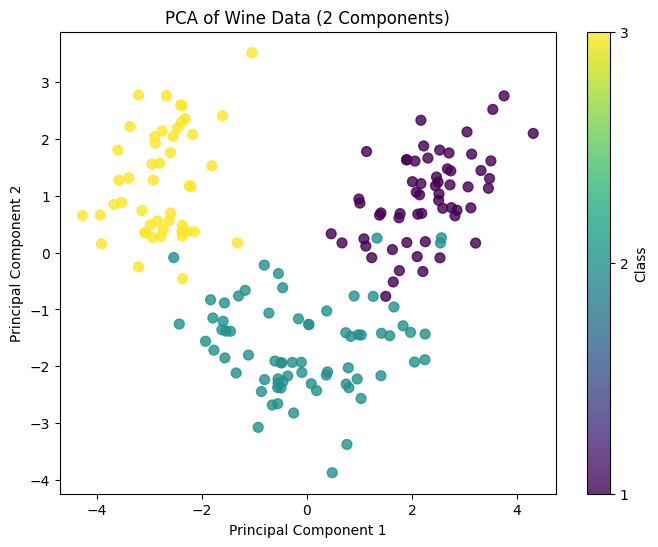


--- Dimensionality Reduction: t-SNE Results ---
Reduced t-SNE Shape: (178, 2)


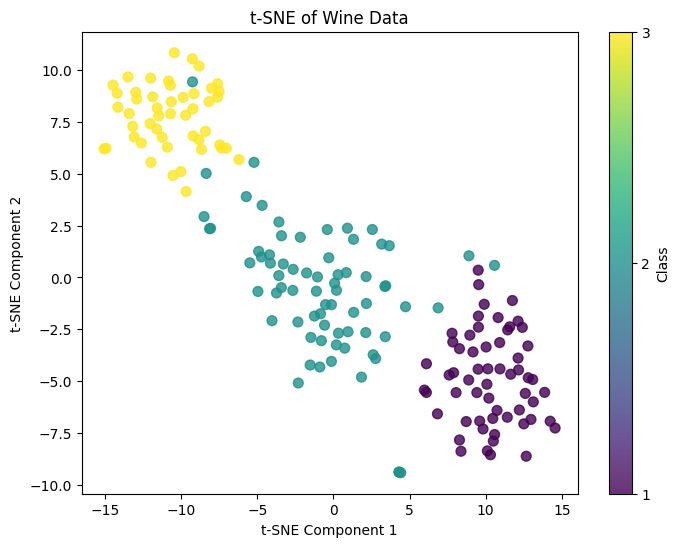

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


# Load and preprocess data from UCI (using Wine dataset as an example)
# Replace with the URL of your desired dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv(url, names=column_names)


# For the Wine dataset, the target variable is 'Class' and features are the rest
X = df.drop('Class', axis=1)
y = df['Class']


# Standardize the data is crucial for PCA and t-SNE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- 1. Principal Component Analysis (PCA) ---
# Reduce to 2 Principal Components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


print("--- Dimensionality Reduction: PCA Results ---")
print(f"Original Feature Count: {X_scaled.shape[1]}")
print(f"Reduced PCA Shape: {X_pca.shape}")
print(f"Explained Variance Ratio by each PC: {pca.explained_variance_ratio_.round(3)}")
print(f"Cumulative Explained Variance: {pca.explained_variance_ratio_.sum():.3f}")


# Optional: Plot PCA (Visualization is the key output)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title('PCA of Wine Data (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=np.unique(y), label='Class')
plt.show()
#


# --- 2. t-distributed Stochastic Neighbor Embedding (t-SNE) ---
# Reduce to 2 Components for visualization
# Note: t-SNE is computationally intensive and should ideally be run on smaller datasets
# or after an initial reduction like PCA. Here we run directly on scaled data.
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)


print("\n--- Dimensionality Reduction: t-SNE Results ---")
print(f"Reduced t-SNE Shape: {X_tsne.shape}")


# Optional: Plot t-SNE
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title('t-SNE of Wine Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, ticks=np.unique(y), label='Class')
plt.show()